In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("./housesaleprediction/kc_house_data.csv")

In [3]:
data.shape

(21613, 21)

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
pd.options.display.max_columns = 25

In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
print(type(data['date'][0]))
print(data['date'][0])

<class 'str'>
20141013T000000


In [8]:
# 切割日期 為 年、月、日
data['year'] = data['date'].str.slice(0, 4)
data['month'] = data['date'].str.slice(4, 6)
data['day'] = data['date'].str.slice(6, 8)

In [9]:
data.drop(columns = ['id'], inplace = True)
data.drop(columns = ['date'], inplace = True)

In [10]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,09
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,02,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,09
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,02,18


In [11]:
data_num = data.shape[0]
print(data_num)

21613


In [12]:
type(data_num)

int

In [13]:
index = np.random.permutation(data_num)

In [14]:
index

array([ 6058,  7811,  1360, ...,  9176,  4962, 12955])

In [15]:
# 切割資料 訓練、驗證、測試 = 6:2:2
train_index = index[:int(data_num * 0.6)]
validation_index = index[int(data_num * 0.6):int(data_num * 0.8)]
test_index = index[int(data_num * 0.8):]

In [16]:
train_index

array([ 6058,  7811,  1360, ..., 16325, 13965, 14071])

In [17]:
train_data = data.loc[train_index].astype(float)
validation_data = data.loc[validation_index].astype(float)
test_data = data.loc[test_index].astype(float)

In [18]:
# 將資料標準化
train_validation_data = pd.concat([train_data, validation_data])
mean = train_validation_data.mean()
std = train_validation_data.std()
train_data = (train_data - mean) / std
validation_data  = (validation_data - mean) / std

In [19]:
x_train = train_data.drop('price', axis = 'columns')
y_train = train_data['price']
x_validation = validation_data.drop('price', axis = 'columns')
y_validation = validation_data['price']

In [20]:
x_train.shape

(12967, 21)

In [21]:
# 建模
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
model = keras.Sequential(name = 'model_20200130')
model.add(layers.Dense(64, activation = 'relu', input_shape = (21,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1))
model.summary()

Model: "model_20200130"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1408      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(keras.optimizers.Adam(0.001), 
              loss = keras.losses.MeanSquaredError(), 
              metrics = [keras.metrics.MeanAbsoluteError()])

In [24]:
import os

In [25]:
model_dir = './tf2_practice_models/'
if not os.path.isdir(model_dir):
    os.mkdir(model_dir)

In [26]:
log_dir = os.path.join('tf2_practice_models', 'model_20200130')
model_callBack = keras.callbacks.TensorBoard(log_dir=log_dir)

In [27]:
model_checkPoint = keras.callbacks.ModelCheckpoint(model_dir + '/best-model-1.h5', 
                                                   monitor = 'val_mean_absolute_error', 
                                                   save_best_only = True,
                                                   mode = 'min')

In [28]:
history = model.fit(x_train, y_train,
                   batch_size = 64,
                   epochs = 300,
                   validation_data = (x_validation, y_validation),
                   callbacks = [model_callBack, model_checkPoint])

Train on 12967 samples, validate on 4323 samples
Epoch 1/300
12967/12967 [==============================] - 0s 36us/sample - loss: 0.3095 - mean_absolute_error: 0.3321 - val_loss: 0.2522 - val_mean_absolute_error: 0.3020
Epoch 2/300
12967/12967 [==============================] - 1s 40us/sample - loss: 0.1997 - mean_absolute_error: 0.2781 - val_loss: 0.2204 - val_mean_absolute_error: 0.2822
Epoch 3/300
12967/12967 [==============================] - 0s 32us/sample - loss: 0.1735 - mean_absolute_error: 0.2628 - val_loss: 0.2038 - val_mean_absolute_error: 0.2760
Epoch 4/300
12967/12967 [==============================] - 0s 26us/sample - loss: 0.1586 - mean_absolute_error: 0.2515 - val_loss: 0.2017 - val_mean_absolute_error: 0.2633
Epoch 5/300
12967/12967 [==============================] - 0s 27us/sample - loss: 0.1498 - mean_absolute_error: 0.2430 - val_loss: 0.1795 - val_mean_absolute_error: 0.2459
Epoch 6/300
12967/12967 [==============================] - 0s 27us/sample - loss: 0.1393 - 

12967/12967 [==============================] - 0s 25us/sample - loss: 0.0537 - mean_absolute_error: 0.1604 - val_loss: 0.1328 - val_mean_absolute_error: 0.2059
Epoch 48/300
12967/12967 [==============================] - 0s 28us/sample - loss: 0.0554 - mean_absolute_error: 0.1622 - val_loss: 0.1319 - val_mean_absolute_error: 0.2018
Epoch 49/300
12967/12967 [==============================] - 0s 22us/sample - loss: 0.0561 - mean_absolute_error: 0.1628 - val_loss: 0.1362 - val_mean_absolute_error: 0.2088
Epoch 50/300
12967/12967 [==============================] - 0s 23us/sample - loss: 0.0549 - mean_absolute_error: 0.1601 - val_loss: 0.1289 - val_mean_absolute_error: 0.2092
Epoch 51/300
12967/12967 [==============================] - 0s 23us/sample - loss: 0.0517 - mean_absolute_error: 0.1587 - val_loss: 0.1318 - val_mean_absolute_error: 0.2031
Epoch 52/300
12967/12967 [==============================] - 0s 29us/sample - loss: 0.0512 - mean_absolute_error: 0.1574 - val_loss: 0.1323 - val_mea

12967/12967 [==============================] - 0s 26us/sample - loss: 0.0449 - mean_absolute_error: 0.1482 - val_loss: 0.1316 - val_mean_absolute_error: 0.2071
Epoch 95/300
12967/12967 [==============================] - 0s 23us/sample - loss: 0.0448 - mean_absolute_error: 0.1480 - val_loss: 0.1279 - val_mean_absolute_error: 0.2053
Epoch 96/300
12967/12967 [==============================] - 0s 24us/sample - loss: 0.0409 - mean_absolute_error: 0.1430 - val_loss: 0.1335 - val_mean_absolute_error: 0.2059
Epoch 97/300
12967/12967 [==============================] - 0s 23us/sample - loss: 0.0391 - mean_absolute_error: 0.1420 - val_loss: 0.1366 - val_mean_absolute_error: 0.2112
Epoch 98/300
12967/12967 [==============================] - 0s 23us/sample - loss: 0.0383 - mean_absolute_error: 0.1415 - val_loss: 0.1328 - val_mean_absolute_error: 0.2070
Epoch 99/300
12967/12967 [==============================] - 0s 23us/sample - loss: 0.0383 - mean_absolute_error: 0.1406 - val_loss: 0.1382 - val_mea

12967/12967 [==============================] - 0s 26us/sample - loss: 0.0340 - mean_absolute_error: 0.1353 - val_loss: 0.1352 - val_mean_absolute_error: 0.2100
Epoch 142/300
12967/12967 [==============================] - 0s 24us/sample - loss: 0.0334 - mean_absolute_error: 0.1339 - val_loss: 0.1365 - val_mean_absolute_error: 0.2075
Epoch 143/300
12967/12967 [==============================] - 0s 27us/sample - loss: 0.0339 - mean_absolute_error: 0.1344 - val_loss: 0.1371 - val_mean_absolute_error: 0.2089
Epoch 144/300
12967/12967 [==============================] - 0s 31us/sample - loss: 0.0351 - mean_absolute_error: 0.1360 - val_loss: 0.1401 - val_mean_absolute_error: 0.2130
Epoch 145/300
12967/12967 [==============================] - 0s 28us/sample - loss: 0.0343 - mean_absolute_error: 0.1356 - val_loss: 0.1368 - val_mean_absolute_error: 0.2126
Epoch 146/300
12967/12967 [==============================] - 0s 27us/sample - loss: 0.0393 - mean_absolute_error: 0.1411 - val_loss: 0.1319 - va

12967/12967 [==============================] - 0s 23us/sample - loss: 0.0320 - mean_absolute_error: 0.1317 - val_loss: 0.1395 - val_mean_absolute_error: 0.2116
Epoch 189/300
12967/12967 [==============================] - 0s 22us/sample - loss: 0.0301 - mean_absolute_error: 0.1285 - val_loss: 0.1438 - val_mean_absolute_error: 0.2159
Epoch 190/300
12967/12967 [==============================] - 0s 25us/sample - loss: 0.0297 - mean_absolute_error: 0.1281 - val_loss: 0.1350 - val_mean_absolute_error: 0.2081
Epoch 191/300
12967/12967 [==============================] - 0s 23us/sample - loss: 0.0284 - mean_absolute_error: 0.1258 - val_loss: 0.1453 - val_mean_absolute_error: 0.2139
Epoch 192/300
12967/12967 [==============================] - 0s 21us/sample - loss: 0.0367 - mean_absolute_error: 0.1364 - val_loss: 0.1369 - val_mean_absolute_error: 0.2102
Epoch 193/300
12967/12967 [==============================] - 0s 22us/sample - loss: 0.0344 - mean_absolute_error: 0.1332 - val_loss: 0.1404 - va

12967/12967 [==============================] - 0s 23us/sample - loss: 0.0297 - mean_absolute_error: 0.1261 - val_loss: 0.1523 - val_mean_absolute_error: 0.2170
Epoch 236/300
12967/12967 [==============================] - 0s 24us/sample - loss: 0.0329 - mean_absolute_error: 0.1307 - val_loss: 0.1446 - val_mean_absolute_error: 0.2151
Epoch 237/300
12967/12967 [==============================] - 0s 23us/sample - loss: 0.0307 - mean_absolute_error: 0.1279 - val_loss: 0.1450 - val_mean_absolute_error: 0.2147
Epoch 238/300
12967/12967 [==============================] - 0s 24us/sample - loss: 0.0293 - mean_absolute_error: 0.1252 - val_loss: 0.1528 - val_mean_absolute_error: 0.2144
Epoch 239/300
12967/12967 [==============================] - 0s 24us/sample - loss: 0.0292 - mean_absolute_error: 0.1263 - val_loss: 0.1491 - val_mean_absolute_error: 0.2182
Epoch 240/300
12967/12967 [==============================] - 0s 23us/sample - loss: 0.0293 - mean_absolute_error: 0.1266 - val_loss: 0.1420 - va

12967/12967 [==============================] - 0s 24us/sample - loss: 0.0262 - mean_absolute_error: 0.1202 - val_loss: 0.1454 - val_mean_absolute_error: 0.2143
Epoch 283/300
12967/12967 [==============================] - 0s 23us/sample - loss: 0.0250 - mean_absolute_error: 0.1186 - val_loss: 0.1435 - val_mean_absolute_error: 0.2138
Epoch 284/300
12967/12967 [==============================] - 0s 23us/sample - loss: 0.0242 - mean_absolute_error: 0.1172 - val_loss: 0.1552 - val_mean_absolute_error: 0.2246
Epoch 285/300
12967/12967 [==============================] - 0s 23us/sample - loss: 0.0253 - mean_absolute_error: 0.1198 - val_loss: 0.1454 - val_mean_absolute_error: 0.2159
Epoch 286/300
12967/12967 [==============================] - 0s 22us/sample - loss: 0.0261 - mean_absolute_error: 0.1203 - val_loss: 0.1523 - val_mean_absolute_error: 0.2203
Epoch 287/300
12967/12967 [==============================] - 0s 24us/sample - loss: 0.0257 - mean_absolute_error: 0.1198 - val_loss: 0.1468 - va

In [29]:
model.save('20200130_my_model_01.h5')

In [30]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

In [31]:
import matplotlib.pyplot as plt

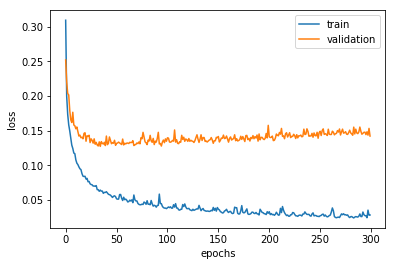

In [32]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc = 'upper right')

In [33]:
#用測試資料驗證模型

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
model = keras.models.load_model("20200130_my_model_01.h5")

In [36]:
import numpy as np

In [37]:
y_test = np.array(test_data['price'])
test_data = (test_data - mean) / std
x_test = np.array(test_data.drop('price', axis = 'columns'))
y_pred = model.predict(x_test)
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape)

In [38]:
percentage_error = np.mean(np.abs(y_test - y_pred) / np.mean(y_test) * 100)

In [39]:
print("model 01 percentage error : {:.2f}%".format(percentage_error))

model 01 percentage error : 14.49%
